In [1]:
from sympy import symbols, Matrix, pprint, collect, factor
from itertools import accumulate
import itertools
from operator import*
x = []
name = "x"
for i in range(1,5):
    v = symbols(name+str(i))
    x.append(v)

A1 = Matrix([[1, 0, 0],[0, 1, 0],[0, 0, 0]])
A2 = Matrix([[0, 0, 0],[0, 0, 1],[0, 0, 0]])
A3 = Matrix([[0, 0, 0],[0, 0, 0],[0,0,1]])

MT = [A1,A2,A3]

E1 = Matrix([[1, 0],[0, 0]])
E2 = Matrix([[0, 1],[0, 0]])
E3 = Matrix([[0, 0],[0, 1]])

beta = [E1,E2,E3]

MatrixA1 = {}
for i in range(3):
    for j in range(3):
        if (i == 0):
            MatrixA1[i,j] = A1[i+j]
        if (i == 1):
             MatrixA1[i,j] = A1[2+i+j]
        if (i == 2):
             MatrixA1[i,j] = A1[4+i+j]
MatrixA2 = {}
for i in range(3):
    for j in range(3):
        if (i == 0):
            MatrixA2[i,j] = A2[i+j]
        if (i == 1):
             MatrixA2[i,j] = A2[2+i+j]
        if (i == 2):
             MatrixA2[i,j] = A2[4+i+j]
MatrixA3 = {}
for i in range(3):
    for j in range(3):
        if (i == 0):
            MatrixA3[i,j] = A3[i+j]
        if (i == 1):
             MatrixA3[i,j] = A3[2+i+j]
        if (i == 2):
             MatrixA3[i,j] = A3[4+i+j]

x = []
name = "x"
for i in range(1,4):
    v = symbols(name+str(i))
    x.append(v)
MT1 = [MatrixA1,MatrixA2,MatrixA3]
a = x[0]*E1+x[1]*E2+x[2]*E3

e = []
name = "e"
for i in range(1,4):
    v = symbols(name+str(i))
    e.append(v)

def functionZ(A):
    s1 = []
    s2 = []
    for i in range(len(A)):
        for k in range(len(A)):
            for m in range(len(A)):
                s1.append((A[m][k,i]- A[i][k,m])*x[m])                                
    Input = s1
    split = len(s1) / 3
    length_to_split = [] #3, 3, 3, 3, 3, 3, 3, 3, 3
    for i in range(int(split)):
          length_to_split.append(3)
    Output = [Input[x - y: x] for x, y in zip(accumulate(length_to_split), length_to_split)]
    s4 = []
    for i in range(len(Output)):
        s3 = sum(Output[i])
        s4.append(s3)
    return(s4)
functionZ(MT1)

[0, -x2, 0, 0, x1 - x3, 0, 0, x2, 0]

In [2]:
# importing Qiskit
from qiskit import IBMQ, Aer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble

# import basic plot tools
from qiskit.visualization import plot_histogram

In [3]:
qreg = QuantumRegister(3)
creg = ClassicalRegister(3)
ancillary = QuantumRegister(2)


qc = QuantumCircuit(qreg, ancillary, creg)

qc.h(range(3))

qc.barrier(qreg)

qc.cx(qreg[1],ancillary[0])
qc.cx(qreg[0],ancillary[1])
qc.cx(qreg[2],ancillary[1])

qc.barrier(qreg)

qc.h(range(3))

qc.measure(qreg[0],creg[0])
qc.measure(qreg[1],creg[1])
qc.measure(qreg[2],creg[2])

qc.draw()

┌───┐ ░                 ░ ┌───┐┌─┐      
q0_0: ┤ H ├─░────────■────────░─┤ H ├┤M├──────
      ├───┤ ░        │        ░ ├───┤└╥┘┌─┐   
q0_1: ┤ H ├─░───■────┼────────░─┤ H ├─╫─┤M├───
      ├───┤ ░   │    │        ░ ├───┤ ║ └╥┘┌─┐
q0_2: ┤ H ├─░───┼────┼────■───░─┤ H ├─╫──╫─┤M├
      └───┘ ░ ┌─┴─┐  │    │   ░ └───┘ ║  ║ └╥┘
q1_0: ────────┤ X ├──┼────┼───────────╫──╫──╫─
              └───┘┌─┴─┐┌─┴─┐         ║  ║  ║ 
q1_1: ─────────────┤ X ├┤ X ├─────────╫──╫──╫─
                   └───┘└───┘         ║  ║  ║ 
c0: 3/════════════════════════════════╩══╩══╩═
                                      0  1  2

{'010': 5, '101': 3, '111': 1, '000': 1}


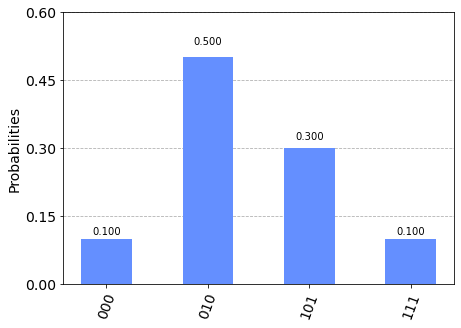

In [4]:
aer_sim = Aer.get_backend('aer_simulator')
transpiled_qc = transpile(qc, aer_sim)
qobj = assemble(transpiled_qc)
results = aer_sim.run(qobj,shots =10).result()
counts = results.get_counts()
print(counts)
plot_histogram(counts)